In [56]:
%cd ../fintools
%load_ext autoreload
%autoreload 2

from industry_data import load_small_large_cap_returns
from metrics import *


C:\Users\dimitri\workspaces\opensource\finance-toolbox\fintools
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Load small cap and large cap returns
rets = load_small_large_cap_returns()


<AxesSubplot:>

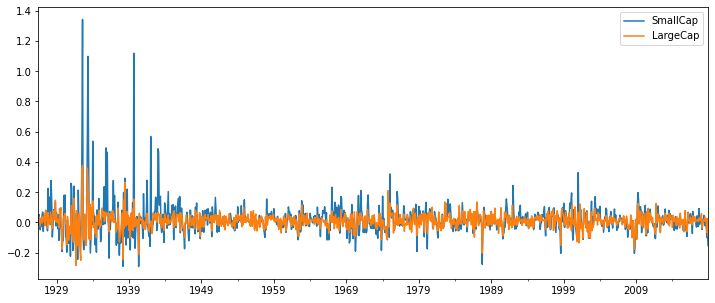

In [14]:
rets.plot(figsize=(12,5))

# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Drawdown = wealth as pct of previous peak

In [31]:
largecap_drawdown = compute_drawdown(rets['LargeCap'])

<AxesSubplot:>

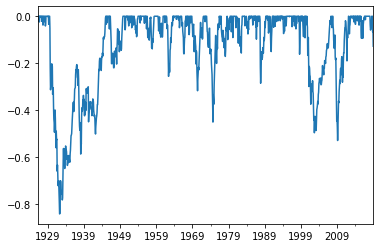

In [32]:
largecap_drawdown.drawdowns.plot()

In [33]:
# find the value of max drawdown
largecap_drawdown.max_drawdown

-0.8400375277943123

In [34]:
# and when it occured
largecap_drawdown.max_drawdown_index

Period('1932-05', 'M')

<AxesSubplot:>

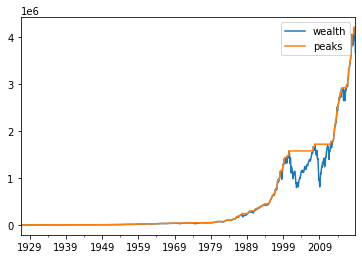

In [36]:
# Plot the wealth vs the peaks
drawdown_df = largecap_drawdown.as_data_frame()
drawdown_df[['wealth','peaks']].plot()

<AxesSubplot:>

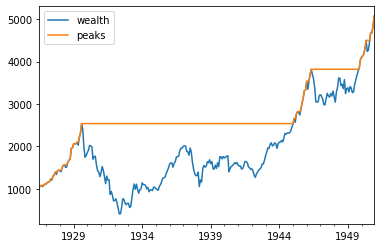

In [40]:
# Zoom in after 1950
compute_drawdown(rets[:'1950']['LargeCap']).as_data_frame()[['wealth','peaks']].plot()

# Markowitz Portfolio

In [59]:
from industry_data import load_industry_data
import matplotlib.pyplot as plt

In [49]:
indrustry_rets = load_industry_data('ind30_m_vw_rets.csv')/100

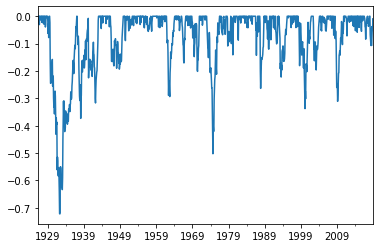

In [52]:
# Plot food drawdowns
food_drawdowns = compute_drawdown(indrustry_rets['Food']).drawdowns.plot()

Text(0.5, 1.0, 'Value At Risk by Industry')

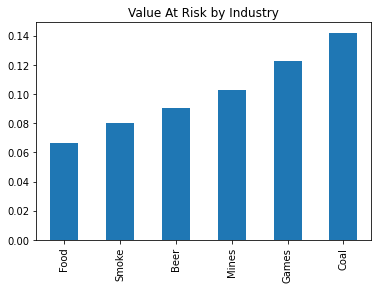

In [60]:
historic_VaR(indrustry_rets[['Food', 'Smoke', 'Coal', 'Beer', 'Games', 'Mines']]).sort_values().plot.bar()
plt.title('Value At Risk by Industry')

In [76]:
from calculator import *
from visualization.efficiency_frontier import plot_efficiency_frontier

er = annualize_returns(indrustry_rets["1996":"2000"], 12)
cov = indrustry_rets["1996":"2000"].cov()

plot_efficiency_frontier(20, er, cov, risk_free_rate=0.1, show_cml=True, show_ew=True, show_gmv=True)

NameError: name 'ind' is not defined